In [1]:
import json
import sys
import numpy as np
import matplotlib.pyplot as plt
import statistics

In [2]:
CHORD_PROGRESSIONS_JSON = "../../out/chord_progressions.json"

with open(CHORD_PROGRESSIONS_JSON) as f:
    songs = json.load(f)
    assert isinstance(songs, list)

songs = [song for song in songs if len(song) > 8]

In [3]:
sys.path.append("..")
from melolib.chord_parser import chord_parser_raw, chord_parser

def count_variants(songs):
    variants_count = {}
    for song in songs:
        for chord in song:
            _, variant = chord_parser_raw(chord)
            variants_count[variant] = variants_count.setdefault(variant, 0) + 1
    return variants_count

chord_variants = count_variants(songs)
total_chords = sum(chord_variants.values())
chord_variant_probabilities = {chord: count / total_chords for chord, count in chord_variants.items()}

chord_variant_probabilities

{'m': 0.23463702819785157,
 '': 0.6615110417575021,
 'dim': 0.0008210243426068288,
 'm7': 0.030433995507314,
 '7': 0.02669349019487854,
 '9': 0.0015502571438041983,
 'sus4': 0.010163363446058445,
 'sus2': 0.008967523642696325,
 '5': 0.009418832054626167,
 '6': 0.0018256317680325758,
 'add9': 0.013977811944629302}

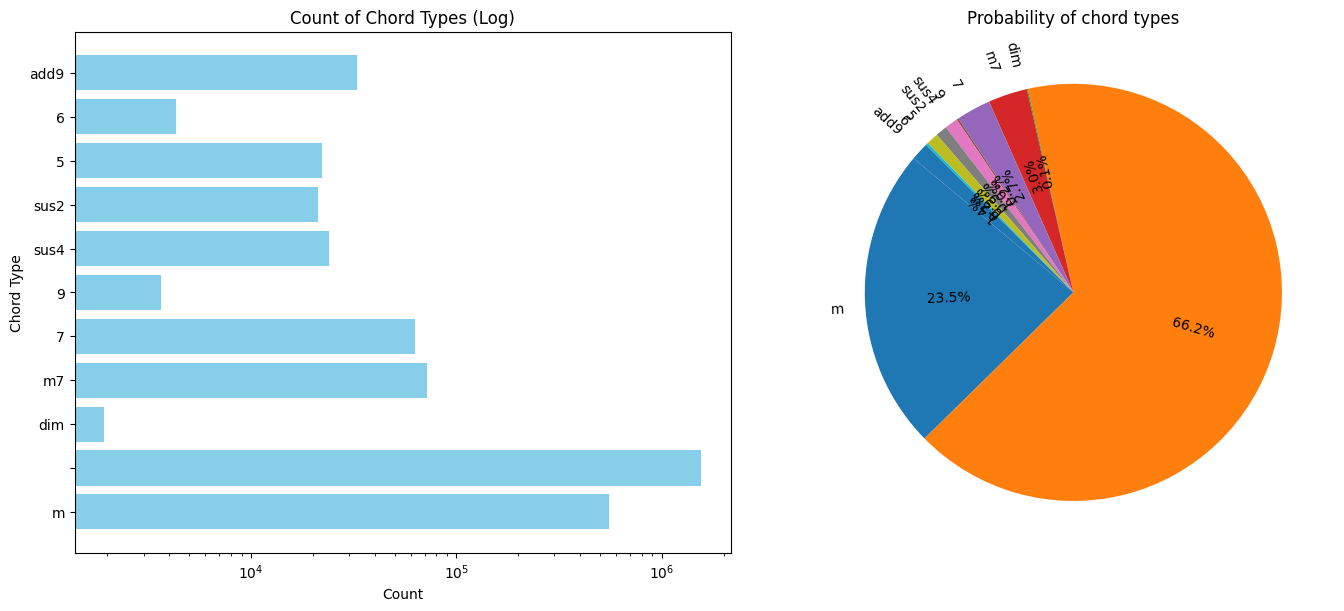

In [4]:
chord_names = list(chord_variants.keys())
chord_counts = list(chord_variants.values())

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), constrained_layout=True)

ax1.barh(chord_names, chord_counts, color='skyblue')
ax1.set_xlabel('Count')
ax1.set_ylabel('Chord Type')
ax1.set_title('Count of Chord Types (Log)')
ax1.set_xscale('log')

wedges, texts, autotexts = ax2.pie(chord_variant_probabilities.values(), labels=chord_variant_probabilities.keys(), autopct='%1.1f%%', startangle=140, rotatelabels=True)
ax2.tick_params(axis='y', rotation=45)
ax2.set_title('Probability of chord types')
angles = [0.5 * (W.theta1 + W.theta2) for W in wedges]
for autotext, angle in zip(autotexts, angles):
    if 170 <= angle <= 190:
        angle -= 180
    autotext.set_rotation(angle)

plt.show()

In [5]:
def measure_complexity(song):
    # 1. variance of chord_complexity
    # 2. average chord_complexity
    # 3. entropy of root notes

    song_complexity = []
    root_note_counts = {}
    for chord in song:
        root, variant = chord_parser_raw(chord)
        song_complexity.append(chord_variant_probabilities[variant])
        root_note_counts[root] = root_note_counts.get(root, 0) + 1

    counts = np.array(list(root_note_counts.values()))
    probabilities = counts / np.sum(counts)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    average_chord_complexity = statistics.mean(song_complexity)
    variance_of_chord_complexity = statistics.variance(song_complexity)
    return variance_of_chord_complexity, average_chord_complexity, entropy

song_complexities = list(map(measure_complexity, songs))

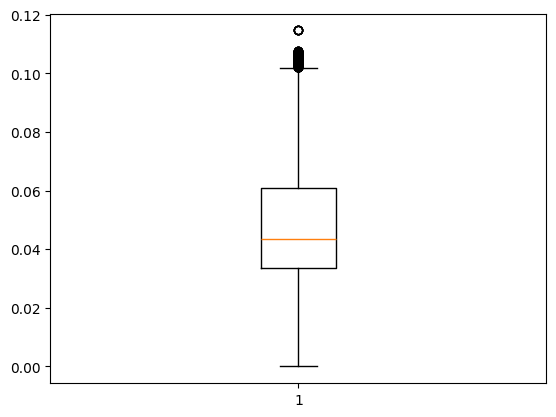

Variance of chord complexity
Mean: 0.046740975707161146
Median: 0.04337429546498668
Mode: 0.0
Standard Deviation: 0.023758036182109275
Variance: 0.0005644442832304135
Minimum: 0.0
Maximum: 0.11464197312444364



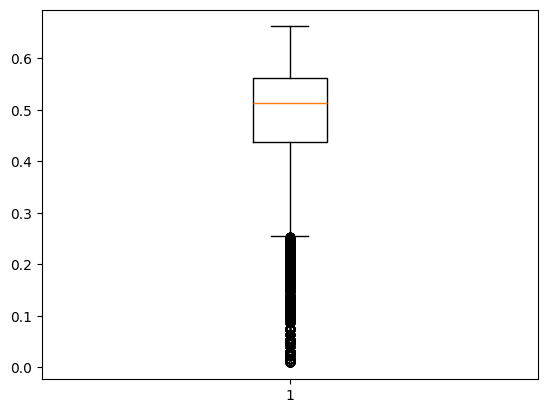

Mean of chord complexity
Mean: 0.48575602662107
Median: 0.5139004015546322
Mode: 0.6615110417575021
Standard Deviation: 0.11822924393418954
Variance: 0.013978154121250096
Minimum: 0.009285857254682553
Maximum: 0.6615110417575021



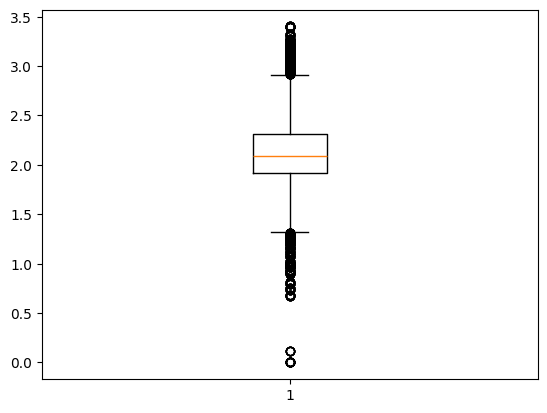

Entropy of root notes
Mean: 2.0954278187867423
Median: 2.0916184583469875
Mode: 2.0
Standard Deviation: 0.3818260827125993
Variance: 0.14579115743964877
Minimum: -0.0
Maximum: 3.4009003805742983



In [6]:
def describe(label, data):
    mean = statistics.mean(data)
    median = statistics.median(data)
    mode = statistics.mode(data)
    std_dev = statistics.stdev(data)
    variance = statistics.variance(data)
    minimum = min(data)
    maximum = max(data)
    plt.boxplot(data)
    plt.show()

    print(label)
    print("Mean:", mean)
    print("Median:", median)
    print("Mode:", mode)
    print("Standard Deviation:", std_dev)
    print("Variance:", variance)
    print("Minimum:", minimum)
    print("Maximum:", maximum)
    print()

variances, means, entropies = zip(*song_complexities)

describe("Variance of chord complexity", variances)
describe("Mean of chord complexity", means)
describe("Entropy of root notes", entropies)

In [ ]:
augmented_dataset = list(zip(song_complexities, songs))

with open("../../out/chord_progressions_augmented.json", "w") as f:
    json.dump(augmented_dataset, f)